In [1]:
# Imports

import numpy as np
import time

from auxiliary_functions.core_window_plotter import *
from auxiliary_functions.winding_maker import *
from auxiliary_functions.core_window_dimensions import *
from leakage_inductance.LeakageInductanceCalculator import *

In [2]:
'''

Flowchart:

##### UNIVERSAL USER INPUT #####

0. Inductor or Transformer?

1. Topology -> Operating Conditions (Frequency, PeakCurrent, etc)

2. Core Selection: Manufacturer -> Family -> Sub Family -> Model Name -> Core Material

3. Bobbin DEFINITION: Normal or Split -> Bobbin Thickness -> IF Normal -> Windings Spacing
                                                          -> IF Split -> Primary Section Height -> Inter-section Spacing -> Secondary Section Height

4. Winding Definition: Number of Turns, Wire Type -> IF Litz -> Number of Strands, Strands Diameter, Insulation Thickness (Strand and Bundle)
                                                     IF Solid -> Diameter, Insulation Thickness


##### AUTOMATIC #####   

1. Fit Check

2. Windings Parameters Calculation

3. ?

'''

'\n\nFlowchart:\n\n##### UNIVERSAL USER INPUT #####\n\n0. Inductor or Transformer?\n\n1. Topology -> Operating Conditions (Frequency, PeakCurrent, etc)\n\n2. Core Selection: Manufacturer -> Family -> Sub Family -> Model Name -> Core Material\n\n3. Bobbin DEFINITION: Normal or Split -> Bobbin Thickness -> IF Normal -> Windings Spacing\n                                                          -> IF Split -> Primary Section Height -> Inter-section Spacing -> Secondary Section Height\n\n4. Winding Definition: Number of Turns, Wire Type -> IF Litz -> Number of Strands, Strands Diameter, Insulation Thickness (Strand and Bundle)\n                                                     IF Solid -> Diameter, Insulation Thickness\n\n\n##### AUTOMATIC #####   \n\n1. Fit Check\n\n2. Windings Parameters Calculation\n\n3. ?\n\n'

# User Input Block

In [3]:
# 0.
MagneticDeviceType = 'Transformer' # Right now only transformers are supported

# 1.
Topology = 'None'           # WIP
Frequency = 100e3           # Switching Frequency in Hz
PeakCurrent_1 = 1           # Always Referred to the Primary in the case of an Transformer


# 2. Selected Core from the database
#SelectedCore = GetCore("TDK", "ETD", "ETD 29", "ETD 29/16/10", "N87")
SelectedCore = {'manufacturer': 'OUGE', 'family': 'ETD', 'sub_family': 'ETD34', 'model': 'ETD3434', 'core_material': 'OGP44', 'A': 34.2e-3, 'B': 17.3e-3, 'C': 10.8e-3, 'D': 12.1e-3, 'E': 26.4e-3, 'F': 10.7e-3}

# 3. Bobbin Definition
BobbinType = 'Split' 
BobbinThickness = 1e-3  

# IF BobbinType = 'Normal'
WindingsSpacing = 1e-3  
SecondaryYAlign = 'center'

# IF BobbinType = 'Split'
PrimaryHeight        = 10e-3
InterSectionSpacing  = 3e-3
SecondaryHeight      = 5.7e-3
PrimaryYAlignSplit   = 'center'
SecondaryYAlignSplit = 'center'


# 4. Wiring definition
NumberOfTurns_1 = 64
NumberOfTurns_2 = 34
WireType = 'Solid'

# IF WireType = 'Solid'
ConductorDiameter_1   = 0.8e-3
InsulationThickness_1 = 0.05e-3
ConductorDiameter_2   = 0.8e-3
InsulationThickness_2 = 0.05e-3

# IF WireType = 'Litz'
NumberOfStrands             = 40
StrandDiameter              = 0.1e-3
StrandInsulationThickness   = 0.01e-3
BundleInsulationThickness   = 0.1e-3
#ConductorDiameter           = LitzDiameter(NumberOfStrands, StrandDiameter, StrandInsulationThickness, BundleInsulationThickness)   # MODELO DO CHINES PARA DETERMINAR DIAMETRO DO FIO LITZ


# Windings fit check and core window plot

c:\Users\Joshua\OneDrive\Projetos\Magnetics Modeling\Magnetics-Modeling\auxiliary_functions\core_window_plotter.py:97: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  self.ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))


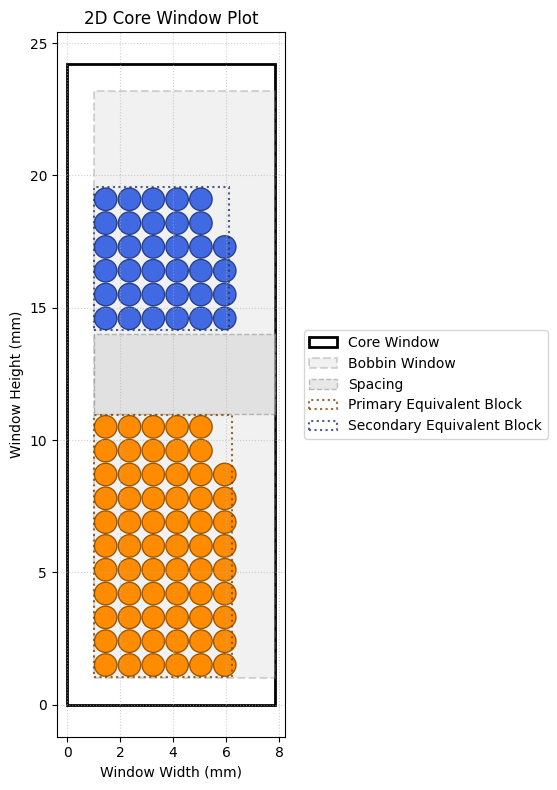

In [4]:
# EXEMPLO ETD34 No. 4

# 1. Core window dimensions are defined based on the selected core from the database
WindowWidth, WindowHeight = core_window_dimensions(SelectedCore)

# 2. Fit Check is done and windings parameters are calculated
WindingsParameters = WindingMaker(WindowWidth, WindowHeight, BobbinType, BobbinThickness,
                 NumberOfTurns_1, NumberOfTurns_2,
                 ConductorDiameter_1, InsulationThickness_1,
                 ConductorDiameter_2, InsulationThickness_2,
                 WindingsSpacing, PrimaryHeight, InterSectionSpacing, SecondaryHeight,
                 SecondaryYAlign, PrimaryYAlignSplit, SecondaryYAlignSplit)

# 3.
TurnsCoordinates = WindingsParameters.get_all_coordinates()
EquivalentWindingsBlocks = WindingsParameters.get_equivalent_dims()

# 4. Core Window Plot
CoreWindowPlot = TransformerPlotter(
    WindowWidth, WindowHeight, 
    BobbinThickness, BobbinType,
    PrimaryHeight, InterSectionSpacing
)

CoreWindowPlot.plot_geometry(
    coordinates=TurnsCoordinates, 
    winding_dims=EquivalentWindingsBlocks,
    ConductorDiameter_1=ConductorDiameter_1, InsulationThickness_1=InsulationThickness_1,
    ConductorDiameter_2=ConductorDiameter_2, InsulationThickness_2=InsulationThickness_2
)

CoreWindowPlot.finalize_and_show()


# Leakage Inductance Calculation (HQ3D)

In [5]:
inicio = time.perf_counter()

# Passo 1: Crie a instância da classe (o cálculo acontece aqui, automaticamente)
TransformerLeakageInductance = LeakageInductanceCalculator(
    SelectedCore, 
    'Primary',
    WindowWidth, WindowHeight,
    EquivalentWindingsBlocks,
    NumberOfTurns_1, NumberOfTurns_2
)

fim = time.perf_counter()
print(f"Execution Time = {(fim - inicio)*1e3:.1f} ms")

# Passo 2: Acesse o resultado que já foi calculado e armazenado
print(f"Transformer Leakage Inductance = {TransformerLeakageInductance.LeakageInductance*1e6:.2f} uH")


Execution Time = 26.9 ms
Transformer Leakage Inductance = 254.96 uH


# Winding Loss Calculation (TS-RMS)